# Valuing European Option Using Heston Model.
##### Heston model can be used to value options by modeling the underlying asset such as the stock of a company. The one major feature of the Heston model is that it inocrporates a stochastic volatility term.

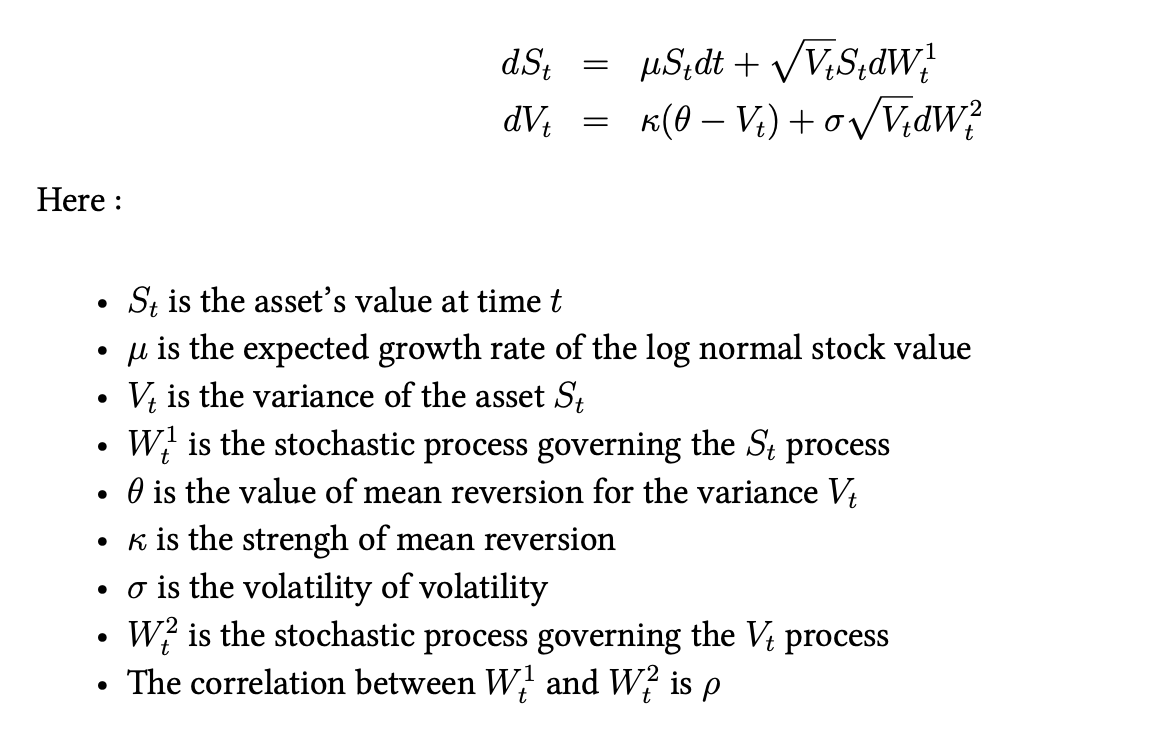

In [1]:
from QuantLib import *
import matplotlib.pyplot as plt
import numpy as np
#from scipy.integrate import simps, cumtrapz, romb % matplotlib inline
import math

##### Let us consider a European call option for AAPL with a strike price of 130 maturing on 15th Jan, 2016. Let the spot price be 127.62. The volatility of the underlying stock is know to be 20%, and has a dividend yield of 1.63%. We assume a short term risk free rate of 0.1%. Lets value this option as of 1st January, 2022.

In [2]:
# option parameters
strike_price = 110.0
payoff = PlainVanillaPayoff(Option.Call, strike_price)

# option data
maturity_date = Date(15, 1, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols for a year
dividend_rate =  0.0163
option_type = Option.Call
risk_free_rate = 0.001
day_count = Actual365Fixed()
calendar = UnitedStates()
calculation_date = Date(8, 5, 2015)
Settings.instance().evaluationDate = calculation_date

##### Using the above inputs, we construct the European option as shown below.

In [3]:
# construct the European Option
payoff = PlainVanillaPayoff(option_type, strike_price)
exercise = EuropeanExercise(maturity_date)
european_option = VanillaOption(payoff, exercise)

In [4]:
# Creating the Heston process
v0 = volatility*volatility  # spot variance
kappa = 0.1
theta = v0
sigma = 0.1
rho = -0.75

spot_handle = QuoteHandle(SimpleQuote(spot_price))
flat_ts = YieldTermStructureHandle(FlatForward(calculation_date, risk_free_rate, day_count))
dividend_yield = YieldTermStructureHandle(FlatForward(calculation_date, dividend_rate, day_count))
heston_process = HestonProcess(flat_ts, dividend_yield, spot_handle, v0, kappa, theta, sigma, rho)

In [5]:
# Net present value
engine = AnalyticHestonEngine(HestonModel(heston_process),0.01, 1000) 
european_option.setPricingEngine(engine)
h_price = european_option.NPV()
print("The Heston model price is", h_price)

The Heston model price is 6.533855481449102
